# Exploratory Data Analysis on IPL Data

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:

%matplotlib inline     
sns.set_style("white")

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 5)


# Data Preparation and Cleaning

**Matches**

In [3]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')
matches.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

Let's check if the dataset contains Nan values

In [5]:
match_na = matches.isna().sum()
match_na[match_na > 0]

city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64

After inspecting the dataset we found that the columns winner, result, player_of_match has 4 nans. We found that the matches that were tied due to rains have nans in these columns. We can drop the nan rows as it will not affect our analysis.

In [6]:
matches = matches.dropna(subset = ['winner', 'result', 'player_of_match'])
matches.shape

(812, 17)

The column 'method' has the highest number of NaNs in the dataset. The best course of action would probably be to drop the entire column. However, the rows where the 'method' column does have values are those matches where D/L method was used. Let us store it in another DataFrame and drop 'method' from matches.

In [7]:
DL = matches.dropna(subset = ['method'])
matches = matches.drop('method', axis = 1)

In [8]:
DL.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,17-05-2008,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,18-05-2008,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,19-04-2009,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186,Durban,21-04-2009,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214,Centurion,07-05-2009,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene


Matches that were held in Dubai International Stadium had NaNs in their city column.

In [9]:
matches.loc[matches.city.isna(), 'city'] = 'Dubai'

Lets take a look at the 'result_margin' column which has na values.

In [10]:
matches.loc[matches.result_margin.isna()].head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
66,392190,Cape Town,23-04-2009,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,MR Benson,M Erasmus
130,419121,Chennai,21-03-2010,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,K Hariharan,DJ Harper
328,598004,Hyderabad,07-04-2013,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,AK Chaudhary,S Ravi
341,598017,Bangalore,16-04-2013,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,29-04-2014,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,Aleem Dar,AK Chaudhary


After close inspection, we found that result_margin has nans in matches that were tied.

In [11]:
matches.loc[matches.result == 'tie', 'result_margin'] = 0

Let's see if all the na values are taken care of...

In [12]:
match_na = matches.isna().sum()
match_na[match_na > 0]

Series([], dtype: int64)

After inspecting the matches dataset, we found that the team 'Rising Pune Supergiant' is written as 'Rising Pune Supergiants'. Also, Delhi Daredevils and Delhi Capitals are the same team. Lets fix this.

In [13]:
matches.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [14]:
matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [15]:
matches.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium',inplace=True)

In [16]:
matches.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [17]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

In [18]:
matches.replace('RG Sharma','R Sharma', inplace=True)

**Deliveries**

In [19]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [20]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [21]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

Let's fix the team names same as Matches.

In [22]:
deliveries.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace = True)

In [23]:
deliveries.replace('Delhi Daredevils', 'Delhi Capitals', inplace = True)

## EXPLORATORY DATA ANALYSIS

### **Does winning the toss affects the outcome of a match for a team?**<br>

In [24]:
# Total matches played by a team
partial_count1 = matches['team1'].value_counts()
partial_count2 = matches['team2'].value_counts()
total_matches = np.add(partial_count1, partial_count2).sort_values(ascending = False)
total_matches.head(15)

Mumbai Indians                 203
Delhi Capitals                 192
Kolkata Knight Riders          192
Royal Challengers Bangalore    192
Kings XI Punjab                190
Chennai Super Kings            178
Rajasthan Royals               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Gujarat Lions                   30
Rising Pune Supergiant          30
Kochi Tuskers Kerala            14
dtype: int64

In [25]:
toss_match_wins = matches.loc[(matches['toss_winner'] == matches['winner']), 'toss_winner'].value_counts()
toss_match_wins

Chennai Super Kings            61
Mumbai Indians                 61
Kolkata Knight Riders          55
Delhi Capitals                 45
Rajasthan Royals               44
Royal Challengers Bangalore    43
Kings XI Punjab                36
Sunrisers Hyderabad            29
Deccan Chargers                19
Gujarat Lions                  10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            4
Pune Warriors                   3
Name: toss_winner, dtype: int64

In [26]:
win_per_after_toss = np.divide(toss_match_wins, total_matches)*100
win_per_after_toss

Chennai Super Kings            34.269663
Deccan Chargers                25.333333
Delhi Capitals                 23.437500
Gujarat Lions                  33.333333
Kings XI Punjab                18.947368
Kochi Tuskers Kerala           28.571429
Kolkata Knight Riders          28.645833
Mumbai Indians                 30.049261
Pune Warriors                   6.666667
Rajasthan Royals               27.672956
Rising Pune Supergiant         26.666667
Royal Challengers Bangalore    22.395833
Sunrisers Hyderabad            23.387097
dtype: float64

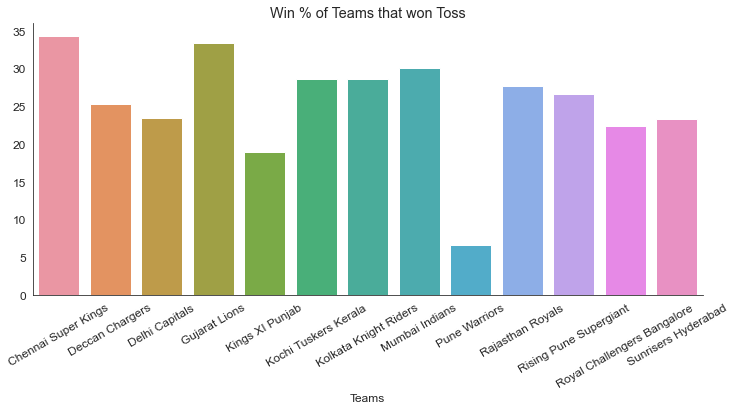

In [27]:
sns.barplot(x = win_per_after_toss.index, y = win_per_after_toss.values, )
sns.despine()
_ = plt.xticks(rotation = 30)
plt.title('Win % of Teams that won Toss')
_ = plt.xlabel('Teams')

> *All the percentages are below 50%, hence there isn't any evidence that suggests that winning the toss would increase the chances of winning the match.*

Here I just want to see what would be the chances for a certain team to win a match if it wins the toss.


In [28]:
# When Teams won the toss as well as the match
match_win = matches.loc[matches['winner'] == matches['toss_winner'], 'toss_winner'].value_counts()
match_win



Chennai Super Kings            61
Mumbai Indians                 61
Kolkata Knight Riders          55
Delhi Capitals                 45
Rajasthan Royals               44
Royal Challengers Bangalore    43
Kings XI Punjab                36
Sunrisers Hyderabad            29
Deccan Chargers                19
Gujarat Lions                  10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            4
Pune Warriors                   3
Name: toss_winner, dtype: int64

In [29]:
# Won toss but lost match = Total times teams won toss - WON both toss and match 
match_lose = matches['toss_winner'].value_counts() - match_win
match_lose

Chennai Super Kings            36
Deccan Chargers                24
Delhi Capitals                 54
Gujarat Lions                   5
Kings XI Punjab                49
Kochi Tuskers Kerala            4
Kolkata Knight Riders          43
Mumbai Indians                 45
Pune Warriors                  17
Rajasthan Royals               41
Rising Pune Supergiant          5
Royal Challengers Bangalore    43
Sunrisers Hyderabad            28
Name: toss_winner, dtype: int64

In [30]:
ticks = ['CSK', 'DC', 'DelhiC', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR', 'RPS', 'RCB', 'SRH']
match_win.sort_index(inplace = True)
match_lose.sort_index(inplace = True)
x = np.arange(len(ticks))
width = 0.4

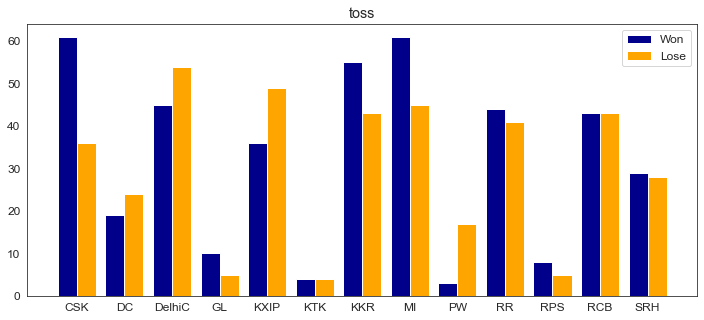

In [31]:
plt.bar(x = x-0.2, height = match_win.values, width = width, label = 'Won', color = 'darkblue')
plt.bar(x = x+0.2, height = match_lose.values, width = width, label = 'Lose', color = 'orange')
plt.xticks(x, ticks)
plt.legend()
_ = plt.title('toss')

> *We can see that there are teams that have actually lost more matches than they have won after winning the toss.*

### does choosing batting or bowling first help in winning matches ?

C:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

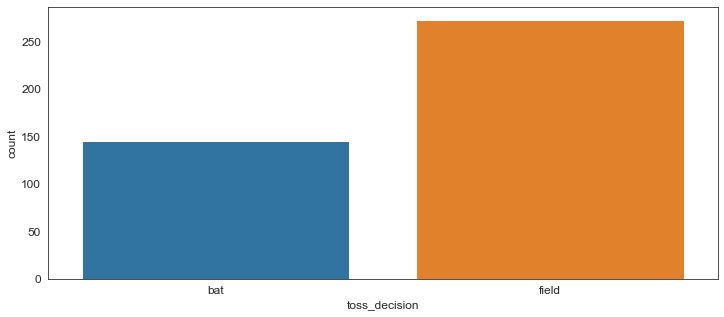

In [32]:
sns.countplot(matches.toss_decision[matches.toss_winner==matches.winner])

**Which team has the highest win?**

In [33]:
winner_counts = matches['winner'].value_counts()
# win_per = np.round(np.divide(winner_counts, total_matches)*100).sort_values(ascending = False)
labels=[X for X in winner_counts.keys()]
winner_counts.head()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Name: winner, dtype: int64

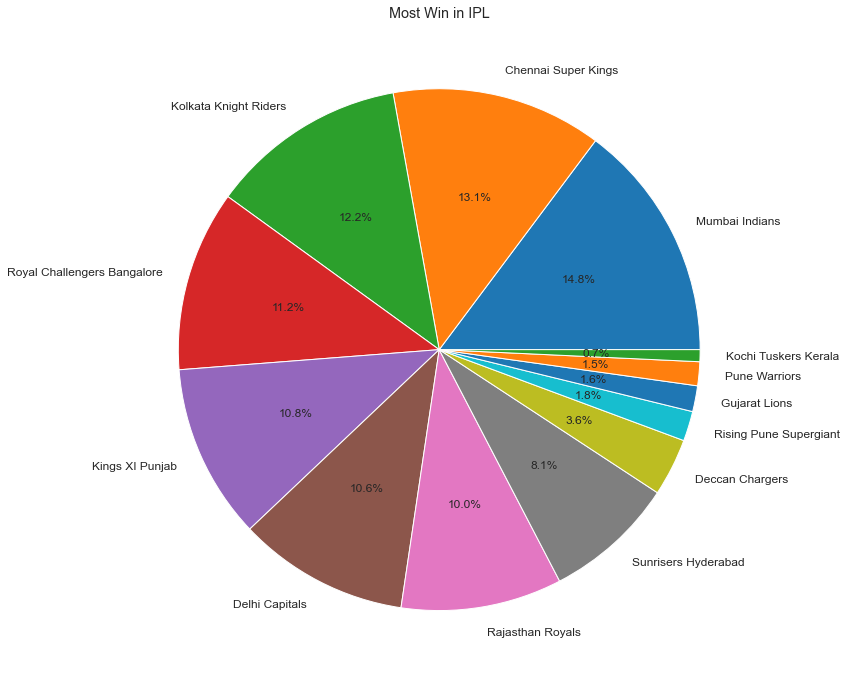

In [34]:
bar,ax=plt.subplots(figsize=(20,12))
ax=plt.pie(x=winner_counts,autopct="%.1f%%", labels=labels)
plt.title("Most Win in IPL")
plt.show()

#### Most wins in Eliminator?

C:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


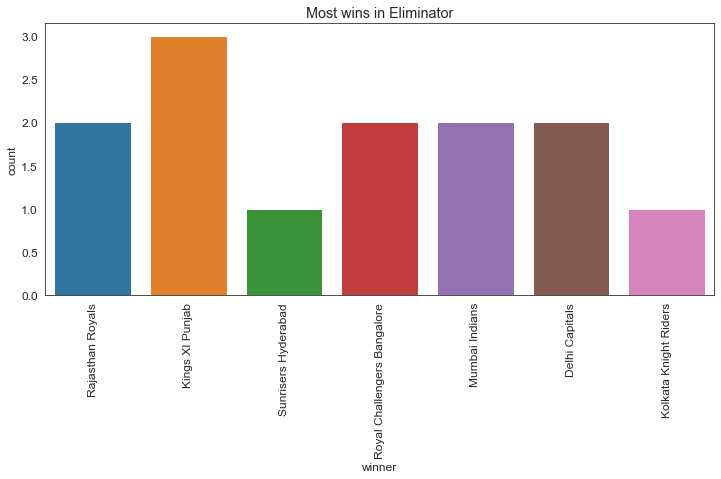

In [35]:
sns.countplot(matches['winner'][matches['eliminator']=='Y'], data=matches)
plt.title("Most wins in Eliminator")
plt.xticks(rotation=90)
plt.show()

#### Toss Decision

In [36]:
teams=matches['toss_winner'].unique()
decision_making=pd.DataFrame([], columns=['Toss Winner','Decision','Times'])

for id,element in enumerate(teams):
    temp_bat=matches[(matches['toss_winner']==element)&(matches['toss_decision']=='bat')]
    temp_field=matches[(matches['toss_winner']==element)&(matches['toss_decision']=='field')]
    
    #append to decision_making
    decision_making=decision_making.append({'Toss Winner':element , 'Decision':'bat', 'Times':temp_bat['toss_winner'].count()}, ignore_index=True)
    
    decision_making=decision_making.append({'Toss Winner':element , 'Decision':'fields','Times':temp_field['toss_winner'].count()}, ignore_index=True)

In [37]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,fields,62
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,fields,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,fields,51
6,Mumbai Indians,bat,48
7,Mumbai Indians,fields,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,fields,19


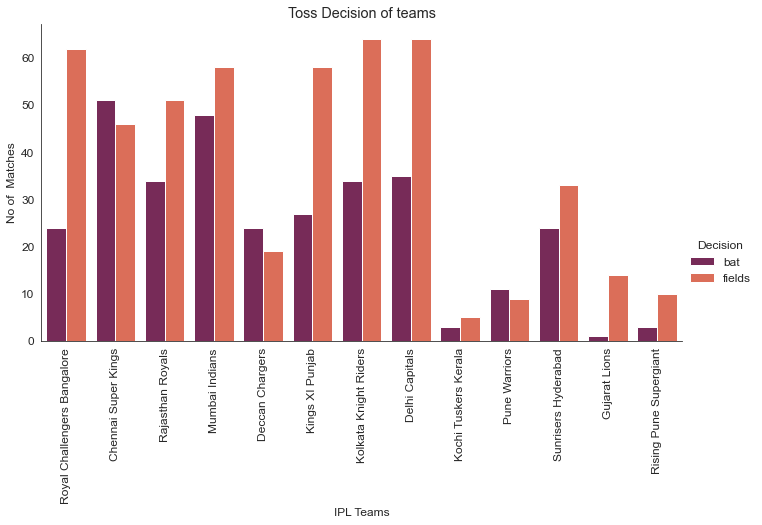

In [38]:
sns.catplot(x="Toss Winner",palette='rocket',y='Times', hue="Decision", data=decision_making ,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title("Toss Decision of teams")
plt.xlabel("IPL Teams")
plt.ylabel("No of  Matches")
plt.show()

#### Famous Venue(hosted most no of matches)

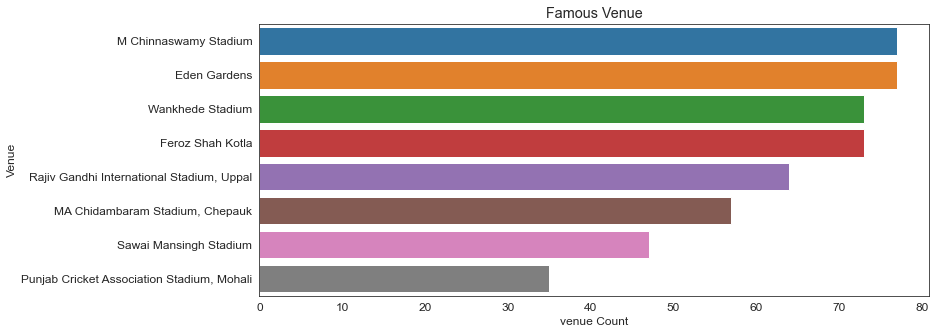

In [39]:
sns.barplot(x=matches['venue'].value_counts().head(8).values,y=matches['venue'].value_counts().head(8).index, data=matches)
plt.title("Famous Venue")
plt.xlabel("venue Count")
plt.ylabel("Venue")
plt.show()

### Probability of winning the match in different venu? with respect to batting/ bowling

In [40]:
target1 = []
chase1 = []
df=matches['venue'].unique()[:15]
top15_stadium = [x for x in df]
for i in top15_stadium : 
    print(i)
    x =matches[(matches['venue'] == i) & (matches['toss_decision']=='bat')].shape[0]
    y =matches[(matches['venue'] == i) & (matches['toss_decision']=='field')].shape[0]
    total = x + y
    t = ((x / total) * 100)
    c = ((y / total) * 100)
    target1.append(round(t, 2))
    chase1.append(round(c, 2))
    print('{:.2f}% probablity that if you choose to bat, then you will win the match.'.format((x / total) * 100))
    print('{:.2f}% probability that if you choose to field, then you will win the match.'.format((y / total) * 100))
    print()

M Chinnaswamy Stadium
11.69% probablity that if you choose to bat, then you will win the match.
88.31% probability that if you choose to field, then you will win the match.

Punjab Cricket Association Stadium, Mohali
40.00% probablity that if you choose to bat, then you will win the match.
60.00% probability that if you choose to field, then you will win the match.

Feroz Shah Kotla
42.47% probablity that if you choose to bat, then you will win the match.
57.53% probability that if you choose to field, then you will win the match.

Wankhede Stadium
30.14% probablity that if you choose to bat, then you will win the match.
69.86% probability that if you choose to field, then you will win the match.

Eden Gardens
36.36% probablity that if you choose to bat, then you will win the match.
63.64% probability that if you choose to field, then you will win the match.

Sawai Mansingh Stadium
40.43% probablity that if you choose to bat, then you will win the match.
59.57% probability that if you 

In [41]:
top15_stadium = [x for x in matches['venue'].unique()[:15]]
data = {'Bat_first': target1,
        'Field_first': chase1}
df2 = pd.DataFrame(data,columns=['Bat_first', 'Field_first'], index = top15_stadium)
df2

,Bat_first,Field_first
M Chinnaswamy Stadium,11.69,88.31
"Punjab Cricket Association Stadium, Mohali",40.00,60.00
Feroz Shah Kotla,42.47,57.53
Wankhede Stadium,30.14,69.86
Eden Gardens,36.36,63.64
Sawai Mansingh Stadium,40.43,59.57
"Rajiv Gandhi International Stadium, Uppal",43.75,56.25
"MA Chidambaram Stadium, Chepauk",63.16,36.84
Dr DY Patil Sports Academy,41.18,58.82
Newlands,57.14,42.86


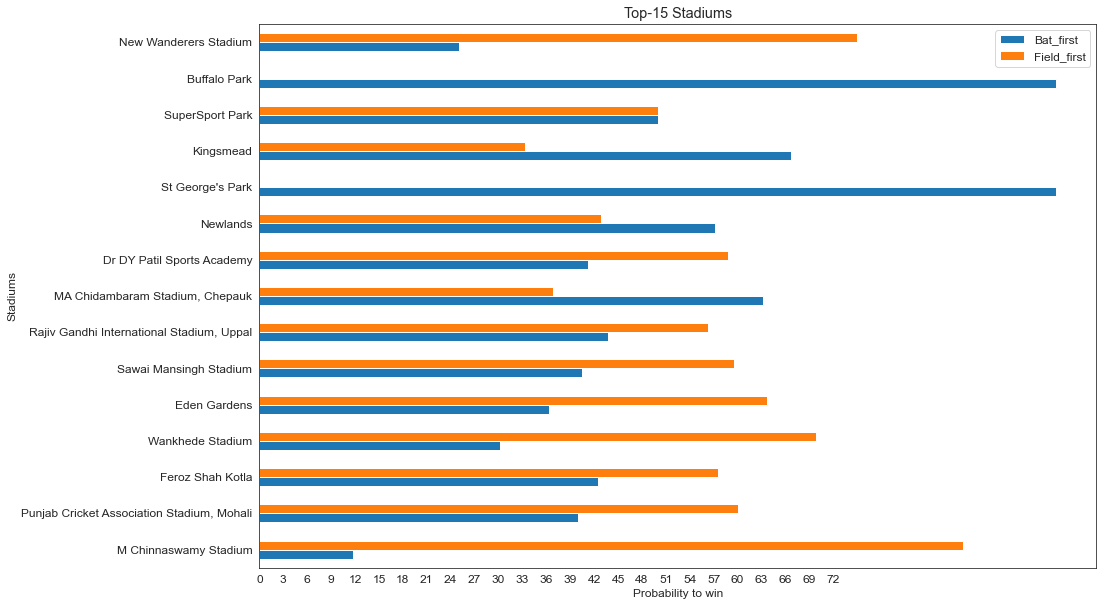

In [42]:
df2.plot.barh(figsize = (15,10))
plt.style.use('seaborn-bright')
plt.title('Top-15 Stadiums')
plt.ylabel('Stadiums')
plt.xlabel('Probability to win')
plt.xticks(np.arange(0, 75, 3))
plt.show()

### Which are the most and least consistent teams across all seasons?

In [43]:
matches_won_each_season = pd.crosstab(matches['winner'], pd.DatetimeIndex(matches['date']).year) 

In [44]:
matches_won_each_season

col_0,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
winner,,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10,6
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0,0
Delhi Capitals,7,10,7,4,11,3,2,5,7,6,5,10,9
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6,7
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11,11
Pune Warriors,0,0,0,4,4,4,0,0,0,0,0,0,0


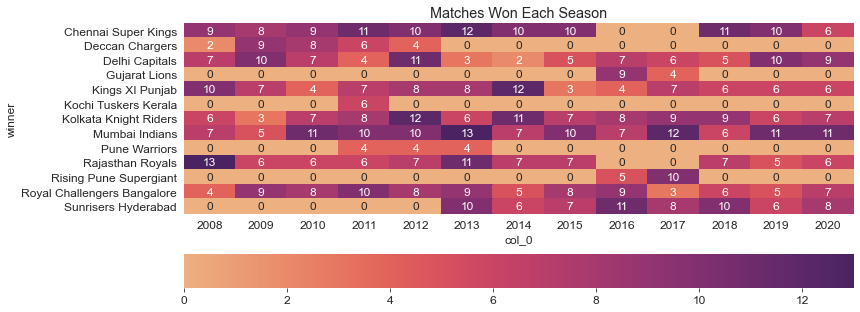

In [45]:
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

### How do wickets fall in IPL


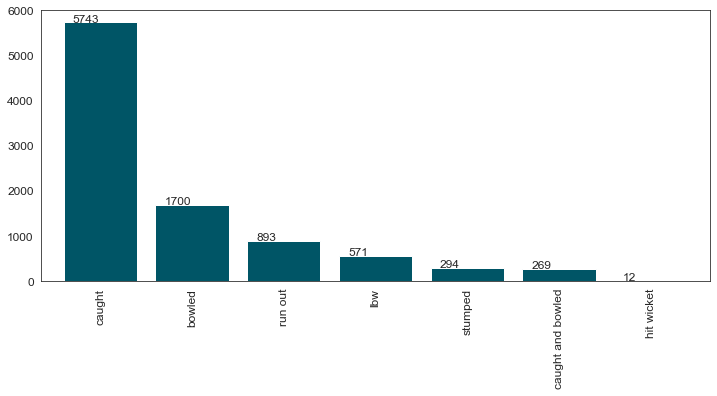

In [46]:
dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismiss)]
ax=ct.dismissal_kind.value_counts()[:10].plot.bar(width=0.8,color='#005566')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


### counting the number of man of the match awards received by each player

AB de Villiers    23
CH Gayle          22
R Sharma          20
DA Warner         17
MS Dhoni          17
                  ..
Z Khan             1
DP Nannes          1
PK Garg            1
J Botha            1
PP Ojha            1
Name: player_of_match, Length: 232, dtype: int64

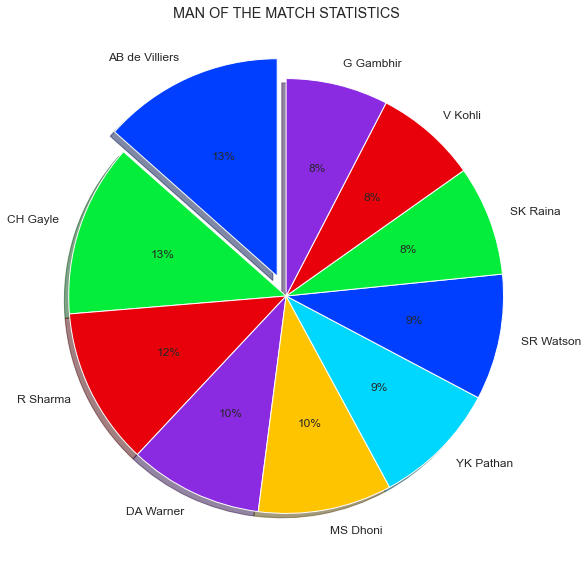

In [47]:
pom_count = matches['player_of_match'].value_counts()
pom = pom_count.index.tolist()

#plotting the data of top 10 players
plt.figure(figsize=(10,10))
plt.pie(pom_count.head(10),labels=pom[:10],autopct='%.0f%%',explode=(0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),shadow=True,startangle=90)
plt.title('MAN OF THE MATCH STATISTICS')
pom_count

**Which batsman hit the most number of sixes?**

In [48]:
batsman_sixes = deliveries[deliveries['batsman_runs'] == 6].groupby(by = ['batsman']).agg(sixes=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'sixes').droplevel('batsman_runs')
batsman_sixes.head()

,sixes
batsman,
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,214
V Kohli,202


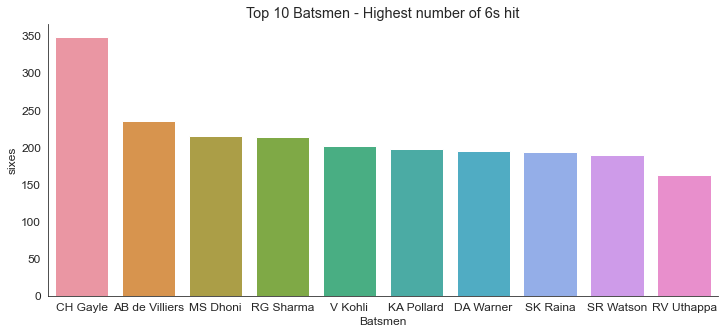

In [49]:
sns.barplot(x = batsman_sixes.index, y = batsman_sixes.sixes)
sns.despine()
plt.title('Top 10 Batsmen - Highest number of 6s hit')
_ = plt.xlabel('Batsmen')

In [50]:
batsman_4s = deliveries[deliveries['batsman_runs'] == 4].groupby(by = ['batsman']).agg(fours=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'fours').droplevel('batsman_runs')
batsman_4s.head()

,fours
batsman,
S Dhawan,591
DA Warner,510
V Kohli,504
SK Raina,493
G Gambhir,492


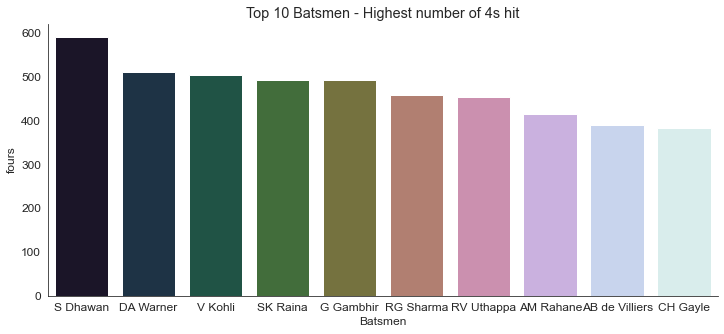

In [51]:
sns.barplot(x = batsman_4s.index, y = batsman_4s.fours,palette='cubehelix' )
sns.despine()
plt.title('Top 10 Batsmen - Highest number of 4s hit')
_ = plt.xlabel('Batsmen')

> *Shikhar Dhavan hit the most number of 4s.*

**Which bowler gave the most number of 6s?**

In [52]:
bowler_6s = deliveries[deliveries['batsman_runs'] == 6].groupby(by = ['bowler']).agg(sixes=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'sixes').droplevel('batsman_runs')
bowler_6s.head()

,sixes
bowler,
PP Chawla,181
A Mishra,172
RA Jadeja,148
Harbhajan Singh,142
DJ Bravo,138


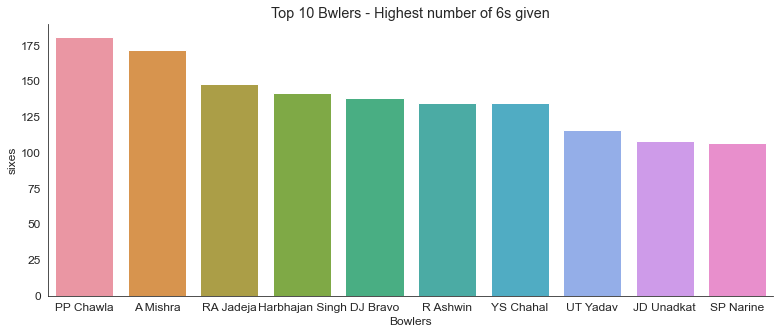

In [53]:
plt.figure(figsize = ( 13, 5 ))
sns.barplot(x = bowler_6s.index, y = bowler_6s.sixes, )
sns.despine()
plt.title('Top 10 Bwlers - Highest number of 6s given')
_ = plt.xlabel('Bowlers')

> *Batsmen hit most number of 6s against PP Chawla*

**Which bowler gave the most number of 4s?**

In [54]:
bowler_4s = deliveries[deliveries['batsman_runs'] == 4].groupby(by = ['bowler']).agg(fours=pd.NamedAgg(column="batsman_runs", aggfunc="value_counts")).nlargest(n = 10, columns = 'fours').droplevel(1)
bowler_4s.head()

,fours
bowler,
UT Yadav,393
P Kumar,338
B Kumar,336
PP Chawla,316
SL Malinga,314


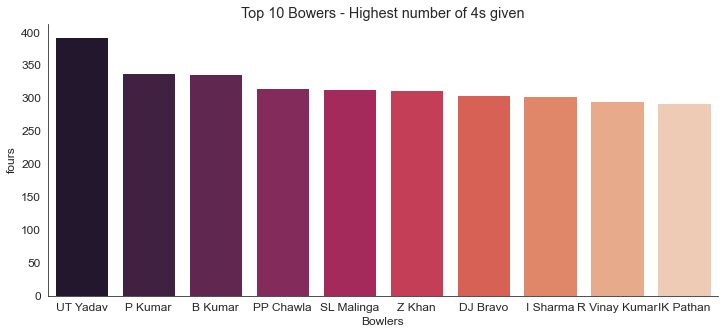

In [55]:
sns.barplot(x = bowler_4s.index, y = bowler_4s.fours,palette='rocket')
sns.despine()
plt.title('Top 10 Bowers - Highest number of 4s given')
_ = plt.xlabel('Bowlers')

> *Batsmen hit most number of 4s against UT Yadav*

## We have always wondered whether the teams batting in Inning1 has more advantage over their rival teams.<br> 

**Which teams are more likely to win ?** 

In [56]:
total_runs_inning = deliveries.groupby(by =['id', 'inning']).agg({'total_runs':'sum'}).reset_index()
winners_ = pd.pivot_table(data = total_runs_inning, columns = 'inning', index = 'id', values = 'total_runs')
winners_['won'] = np.where(winners_[1]>winners_[2], 'Innings 1', 'Innings 2')
winners_['won'] = np.where(winners_[1]==winners_[2], 'draw', winners_['won'])
winners_.head()

inning,1,2,won
id,,,
335982,222.0,82.0,Innings 1
335983,240.0,207.0,Innings 1
335984,129.0,132.0,Innings 2
335985,165.0,166.0,Innings 2
335986,110.0,112.0,Innings 2


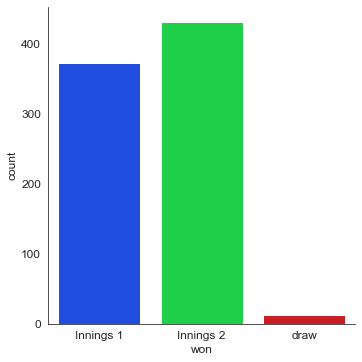

In [57]:
sns.catplot(x="won", kind="count", data=winners_)



>*We can see that the teams playing in the second innings have a slightly better chance at winning. So getting to bat first may not always be the correct alernative.*

### Checking stats of the Player

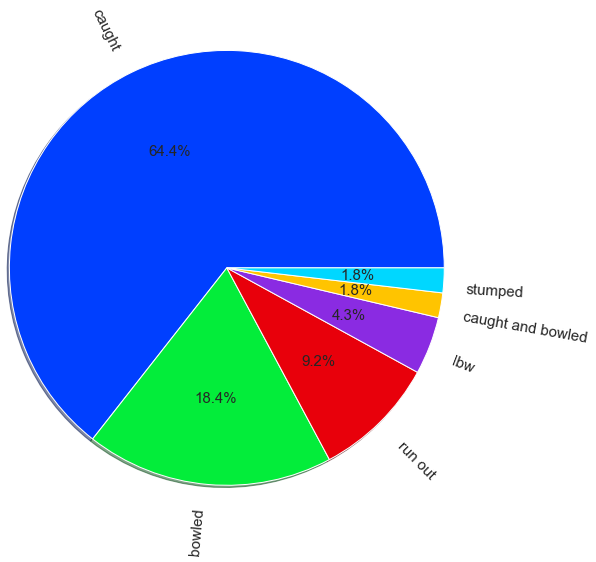

In [58]:
player=(deliveries['batsman']=='V Kohli')
df_virat=deliveries[player]
df_virat['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True,radius=2,fontsize=15)

plt.show()


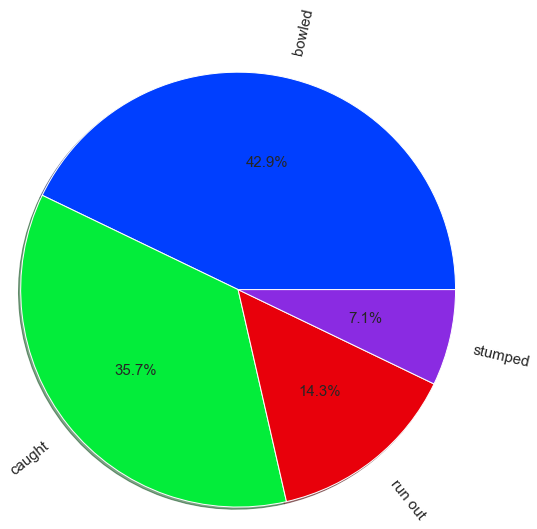

In [59]:
player=(deliveries['batsman']=='UT Yadav')
df_Yadav=deliveries[player]
df_Yadav['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True,radius=2,fontsize=15)

plt.show()


Let's move on to some **Player Statistics**.

Let's count the Centuries scored by each batsmen in each match. Also, we would like to have other information on our batsmen say, Strike rate, total runs scored and balls faced.

In [60]:
runs = deliveries.groupby(by =['batsman', 'id']).agg({'batsman_runs':'sum'})
centuries = runs['batsman_runs'].apply(lambda x: (x // 100)).sum(level = 0)

Wides and noballs are not counted in batsman's record as well as any runs scored on an extras_type ball. So in order to account for that we are not considering wides, noballs, penalty.

In [61]:
k = deliveries[~(deliveries['extras_type'].isin(['wides', 'noballs', 'penalty']))]

In [62]:
batsman_stats = k.groupby(by =['batsman']).agg({'batsman_runs':'sum', 'ball': 'count'})
batsman_stats['Strike_rate'] = 100*batsman_stats['batsman_runs']/batsman_stats['ball']
batsman_stats['Centuries'] = centuries
batsman_stats.head(10)

,batsman_runs,ball,Strike_rate,Centuries
batsman,,,,
A Ashish Reddy,280,193,145.077720,0
A Chandila,4,7,57.142857,0
A Chopra,53,71,74.647887,0
A Choudhary,25,20,125.000000,0
A Dananjaya,4,5,80.000000,0
A Flintoff,62,53,116.981132,0
A Kumble,35,47,74.468085,0
A Mishra,361,387,93.281654,0
A Mithun,34,26,130.769231,0


**Which player scored the most number of centuries?**

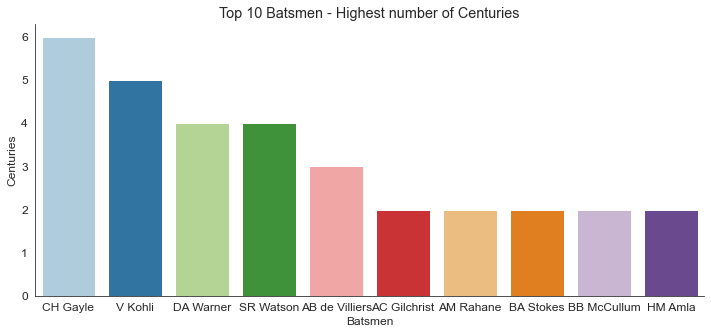

In [63]:
top10 = batsman_stats.nlargest(n = 10, columns = 'Centuries')
sns.barplot(x = top10.index, y = top10['Centuries'],palette='Paired' )
sns.despine()
plt.title('Top 10 Batsmen - Highest number of Centuries')
plt.ylabel('Centuries')
_ = plt.xlabel('Batsmen')

> *Chris Gayle scored 6 centuries which is the highest of all.*

**Which batsman has the highest runs?**

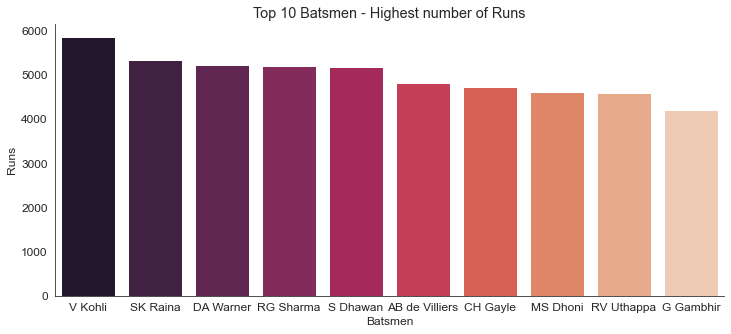

In [64]:
top10 = batsman_stats.nlargest(n = 10, columns = 'batsman_runs')
sns.barplot(x = top10.index, y = top10['batsman_runs'],palette='rocket')
sns.despine()
plt.title('Top 10 Batsmen - Highest number of Runs')
plt.ylabel('Runs')
_ = plt.xlabel('Batsmen')

> *Virat Kohli scored the highest number of runs throuhout the IPL.*

 **Which player has the highest strike rate?**

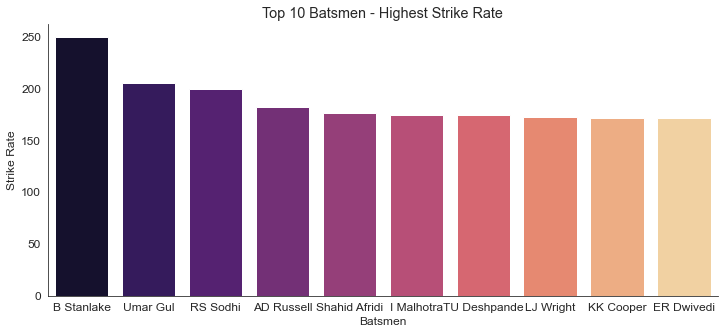

In [65]:
top10 = batsman_stats.nlargest(n = 10, columns = 'Strike_rate')
sns.barplot(x = top10.index, y = top10['Strike_rate'],palette='magma' )
sns.despine()
plt.title('Top 10 Batsmen - Highest Strike Rate')
plt.ylabel('Strike Rate')
_ = plt.xlabel('Batsmen')

> *B Stanlake has the highest Strike rate.*

Similarly, we would also like to have some statistics on our bowlers as well, for e.g. total wickets, Maidens, Strike rate (balls / wicket), Bowling Average (Total runs / wickets).<br><br>
**Data Preparation.**

In [66]:
run_per_over = deliveries.groupby(by =['bowler', 'id', 'over']).agg({'total_runs':'sum'})
maidens = run_per_over['total_runs'].apply(lambda x: x == 0).sum(level = 0)

In [67]:
bowler_stats = deliveries.groupby(by ='bowler').agg({'total_runs':'sum', 'ball': 'count', 'is_wicket':'sum'})
bowler_stats['Strike_rate'] = np.divide(bowler_stats['ball'], bowler_stats['is_wicket'])
bowler_stats['BowlingAve'] = np.divide(bowler_stats['total_runs'], bowler_stats['is_wicket'])
bowler_stats['Maidens'] = maidens.astype('int32')
bowler_stats.head(3)

,total_runs,ball,is_wicket,Strike_rate,BowlingAve,Maidens
bowler,,,,,,
A Ashish Reddy,400,270,19,14.210526,21.052632,0
A Chandila,245,234,11,21.272727,22.272727,0
A Choudhary,144,108,5,21.600000,28.800000,2


**Which bowler took the most wickets?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SL Malinga'),
  Text(1, 0, 'DJ Bravo'),
  Text(2, 0, 'A Mishra'),
  Text(3, 0, 'PP Chawla'),
  Text(4, 0, 'Harbhajan Singh'),
  Text(5, 0, 'R Ashwin'),
  Text(6, 0, 'B Kumar'),
  Text(7, 0, 'SP Narine'),
  Text(8, 0, 'UT Yadav'),
  Text(9, 0, 'R Vinay Kumar')])

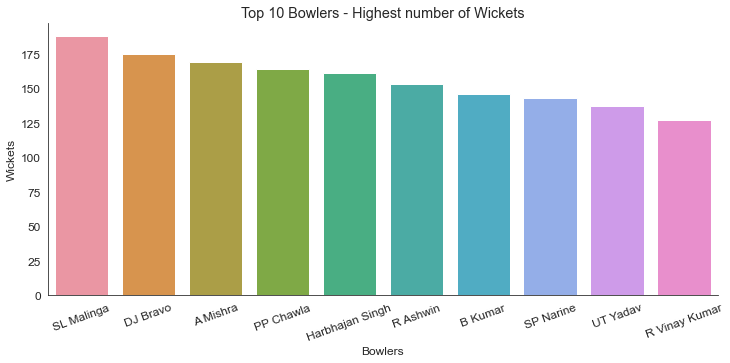

In [68]:
top10 = bowler_stats.nlargest(n = 10, columns = 'is_wicket')
sns.barplot(x = top10.index, y = top10['is_wicket'] )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Wickets')
plt.ylabel('Wickets')
plt.xlabel('Bowlers')
plt.xticks(rotation = 20)

> *SL Malinga took the most number of wickets.*

**Which bowler delivered the most number of Maidens?**

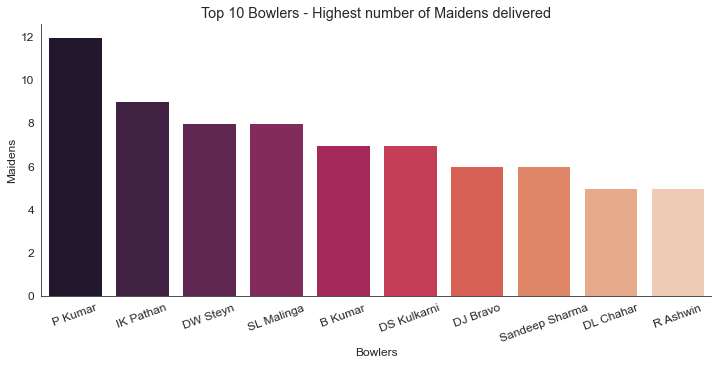

In [69]:
top10 = bowler_stats.nlargest(n = 10, columns = 'Maidens')
sns.barplot(x = top10.index, y = top10['Maidens'],palette='rocket' )
sns.despine()
plt.title('Top 10 Bowlers - Highest number of Maidens delivered')
plt.ylabel('Maidens')
_ = plt.xlabel('Bowlers')
_ = plt.xticks(rotation = 20)

> *P Kumar delivered the most number of maiden.*

### THANK YOU